In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\zomato.csv")
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [5]:
df.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [6]:
#cleaning the rate columnn
df['rate'] = df['rate'].astype(str)

#rows with valid ratings eg: 4.1/5
df = df[df['rate'].str.contains(r'^\d+(?:\.\d+)?/5$', na=False)]

# Remove '/5' and convert to float
df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)

In [7]:
#cleaning approx_cost(for two people) col
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('nan', np.nan)
    .astype(float)
)

In [8]:
#cleaning the 'votes' column
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [9]:
#Drop Rows with Missing Key Data
df.dropna(subset=['approx_cost(for two people)'], inplace=True)

In [10]:
#Visualizations
plt.style.use("seaborn-v0_8-whitegrid")

In [11]:
#df = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\zomato.csv")  # Make sure this is the original untouched file
print(df['cuisines'].head(10))

0                  North Indian, Mughlai, Chinese
1                     Chinese, North Indian, Thai
2                          Cafe, Mexican, Italian
3                      South Indian, North Indian
4                        North Indian, Rajasthani
5                                    North Indian
6     North Indian, South Indian, Andhra, Chinese
7                            Pizza, Cafe, Italian
8                      Cafe, Italian, Continental
10       Cafe, Mexican, Italian, Momos, Beverages
Name: cuisines, dtype: object


C:\Users\mimadmin\AppData\Local\Temp\ipykernel_14864\2161169696.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


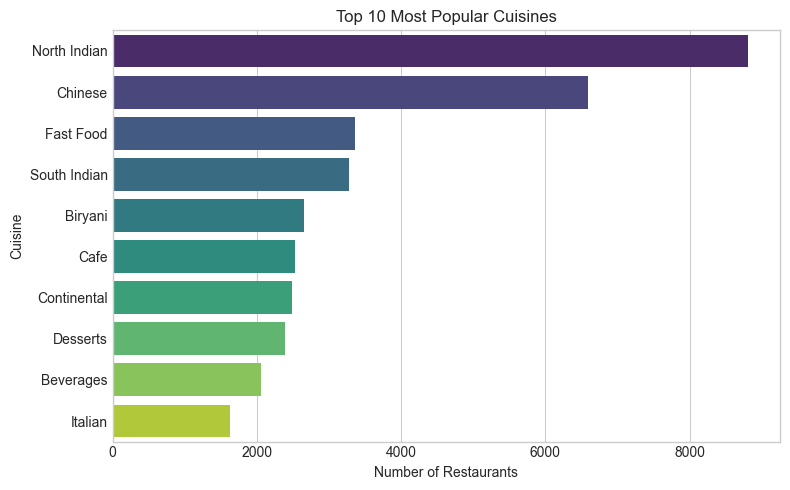

In [12]:
df['cuisines'] = df['cuisines'].astype(str)
df = df[df['cuisines'].notna() & (df['cuisines'].str.strip() != '') & (df['cuisines'] != '-')]

#  Extract top cuisines
top_cuisines = (
    df['cuisines']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

#  Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_14864\4191657327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette='coolwarm')


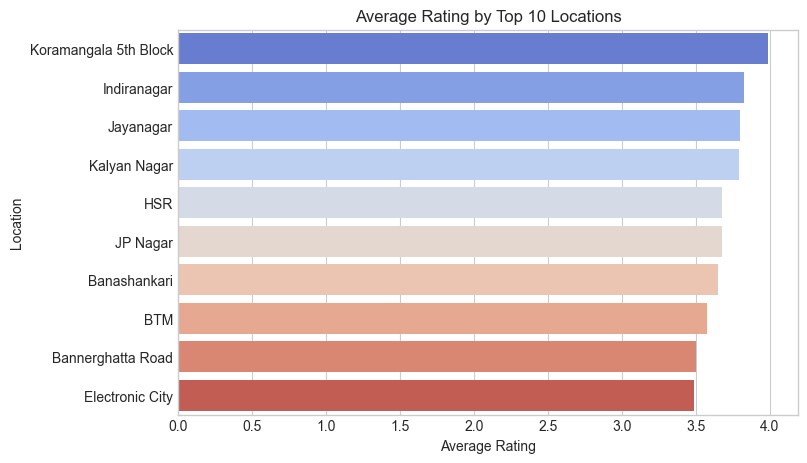

In [13]:
top_locations = df['location'].value_counts().head(10).index
avg_rating_by_location = df[df['location'].isin(top_locations)].groupby('location')['rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette='coolwarm')
plt.title('Average Rating by Top 10 Locations')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()


C:\Users\mimadmin\AppData\Local\Temp\ipykernel_14864\3587457721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_order_counts.index, y=online_order_counts.values, palette='pastel')


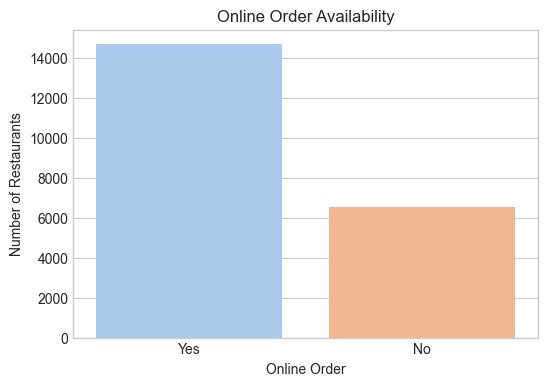

In [14]:
#online order availability
plt.figure(figsize=(6, 4))
online_order_counts = df['online_order'].value_counts()
sns.barplot(x=online_order_counts.index, y=online_order_counts.values, palette='pastel')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Number of Restaurants')
plt.show()